# Lecture 2.2: Advanced ``ggplot``

<div style="border: 1px double black; padding: 10px; margin: 10px">
   
**Goals in this lecture:**
    
* [Statistical Transformations](#Statistical-Transformations)
* [Position Adjustments](#Position-Adjustments)
* [Coordinate Systems](#Coordinate-Systems)
    
This lecture note corresponds to Sections 3.7-3.10 in the book.
    
* We will then go through the data set `mpg` by answering several questions using plots
* We will then try to understand the millenials betteer



</div>



# Statistical Transformations

In a lot of graphs, `ggplot` will automatically transform the original variable into some other variables.   This is called statistical transformation.  We will investigate statistical transformations through working on several examples.  Recall the **diamonds** data set in the previous lecture.

In [1]:
library(tidyverse)
print(diamonds)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# A tibble: 53,940 × 10
   carat cut       color clarity depth table price     x     y     z
   <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1  0.23 Ideal     E     SI2      61.5    55   326  3.95  3.98  2.43
 2  0.21 Premium   E     SI1      59.8    61   326  3.89  3.84  2.31
 3  0.23 Good      E     VS1      56.9    65   327  4.05  4.07  2.31
 4  0.29 Premium   I     VS2      62.4    58   334  4.2   4.23  2.63
 5  0.31 Good      J     SI2      63.3    58   335  4.34  4.35  2.75
 6  0.24 Very Good J     VVS2     62.8    57   336  3.94  3.96  2.48
 7  0.24 Very Good I     VVS1     62.3    57   336  3.95  3.98  2.47
 8  0.26 Very Good H     SI1      61.9    55   337  4.07  4.11  2.53
 9  0.22 Fair      E     VS2      65.1    61   337  3.87  3.78  2.49
10  0.23 Very Good H     VS1      59.4    61   338  4     4.05  2.39
# … with 53,930 more rows


Let us create a **bar chart** using the **cut** variable. This is done by the ``geom_bar`` geometry.

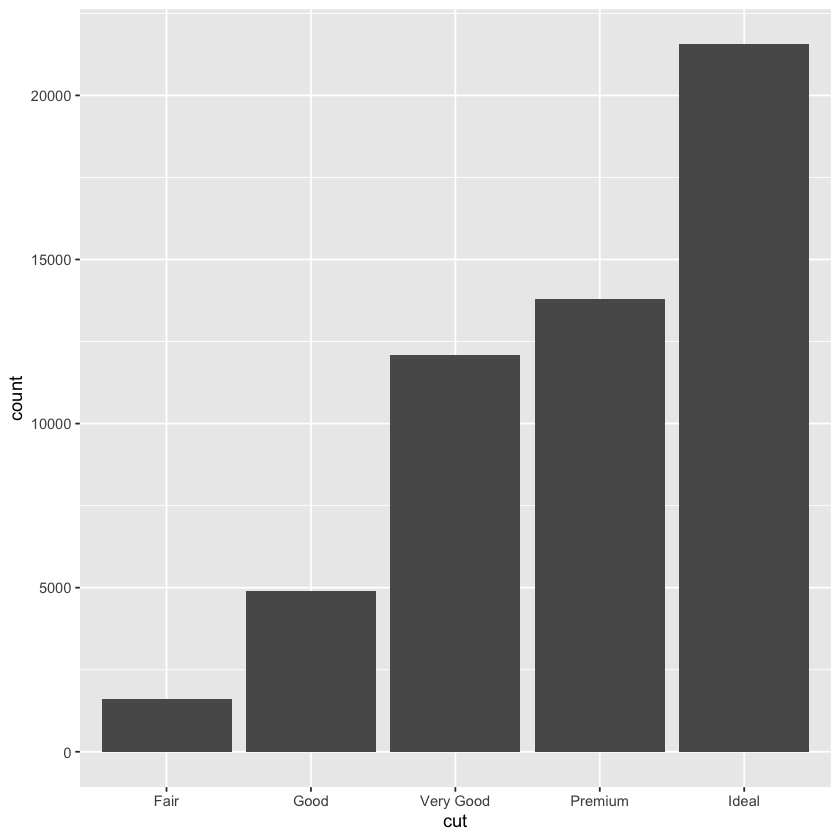

In [2]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut))

The `y-axis` on the bar chart is **count**, and the `x-axis` is the **cut** of the diamond.  The bar chart shows that more diamonds are available with high-quality cuts than with low quality cuts. 

The `y` variable here, **count**, is not even a variable in our data set! What's going on? 🤔

Bar chart basically bin your data, and then plot the bin counts according to the variable **cut**. 

In other words, a **bar chart** differs quite fundamentally from a **scatter plot**. A scatter plot uses the raw data variables directly. A bar chart applies a **statistical transformation** (`stat_count` in our case) to create the counts and then plots the counts vs the raw variable (`cut` in our case).

How do we know that `geom_bar` uses `stat_count` as the default transformation? You can type `?geom_bar` in RStudio or consult the [online documentation](http://ggplot2.tidyverse.org/reference/geom_bar.html).

Geoemtries and Statistical Transformations comes in pairs. E.g.,

* `geom_point` and `"identity"`
* `geom_smooth` and `stat_smooth`
* `geom_bar` and `stat_count`

You can generally use geoms and stats interchangeably.  For example, you can recreate the previous plot using `stat_count` instead of `geom_bar`.  

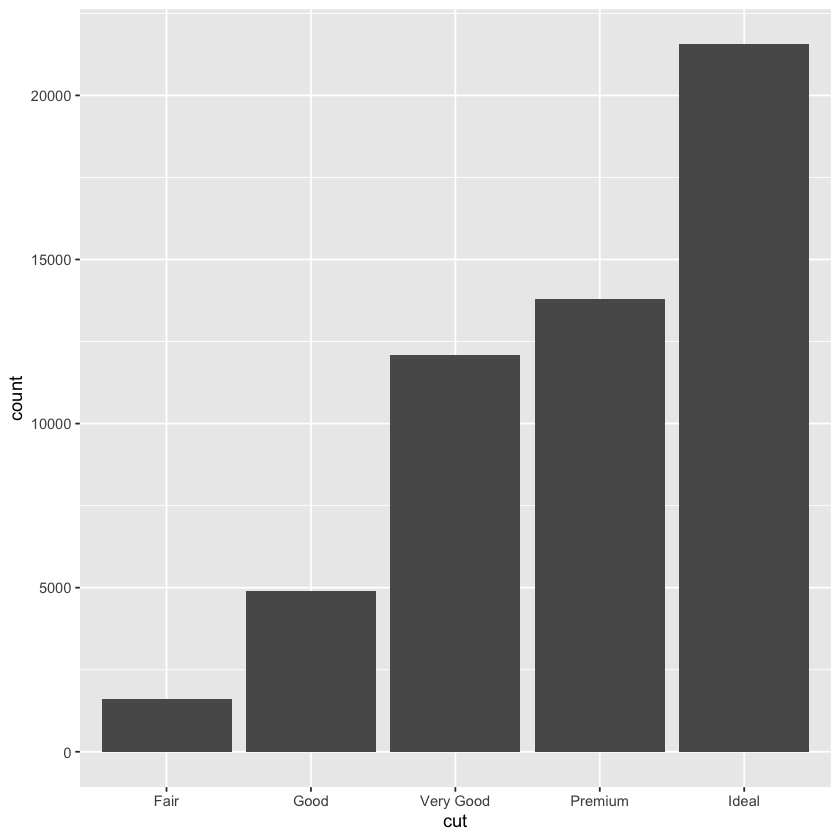

In [3]:
ggplot(data = diamonds) +
    stat_count(mapping = aes(x = cut))

### Override the default transformation

Usually you can typically use `geoms` without worrying about the statistical transformation.  However, there are several situations where we may need to use a `stat` explicitly. An example of a situation when you might want to override the default transformation is the following.

Suppose that in your data, you already have the frequency of the diamond cuts summarized as follows.  

In [4]:
demo <- tribble(
  ~cut,         ~freq,
  "Fair",       1610,
  "Good",       4906,
  "Very Good",  12082,
  "Premium",    13791,
  "Ideal",      21551
)
print(demo)

# A tibble: 5 × 2
  cut        freq
  <chr>     <dbl>
1 Fair       1610
2 Good       4906
3 Very Good 12082
4 Premium   13791
5 Ideal     21551


**Note**: **tibble** is very similar to **data.frame** and we will learn more about it later in the course. 

Now try to plot a barchart for the dimaonds based on the variable **cut** on your new data called **demo**.

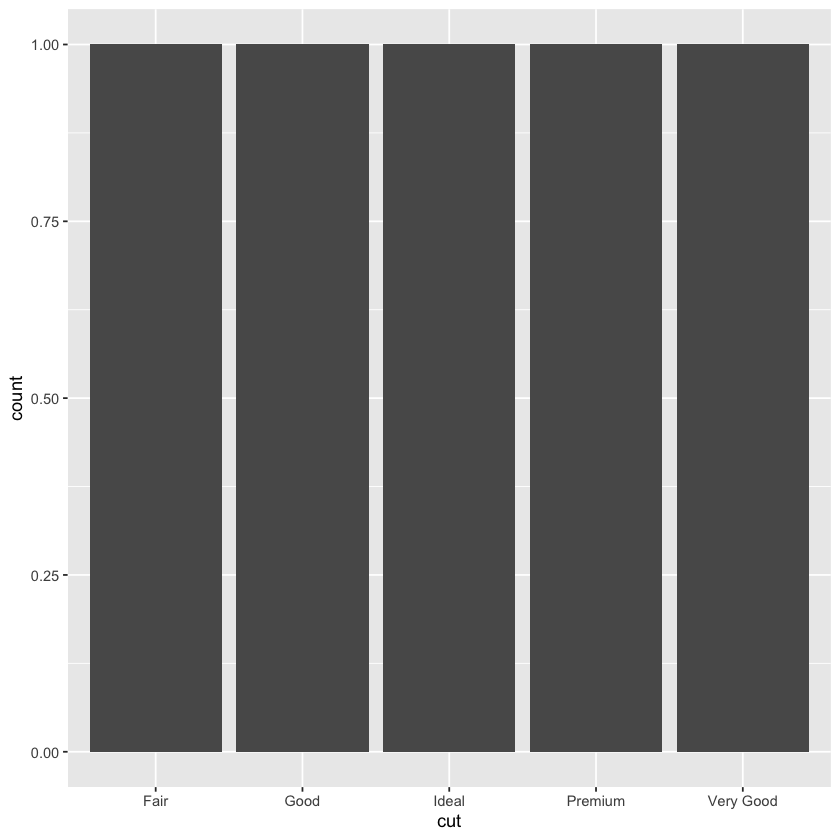

In [5]:
ggplot(data = demo) +
  geom_bar(mapping = aes(x = cut))

Yikes! What is going on here 😱?  The default statistical transformation for `geom_bar` is `stat_count`, which basically counts how many observations are actually fair/good/.../Ideal. In this new data set, we have the frequency recorded for each of the cut, and thus only one observation for each cut.  

Now we will modify the default `stat_count` in `geom_bar` to plot the same barchart as the one that we have seen before. 

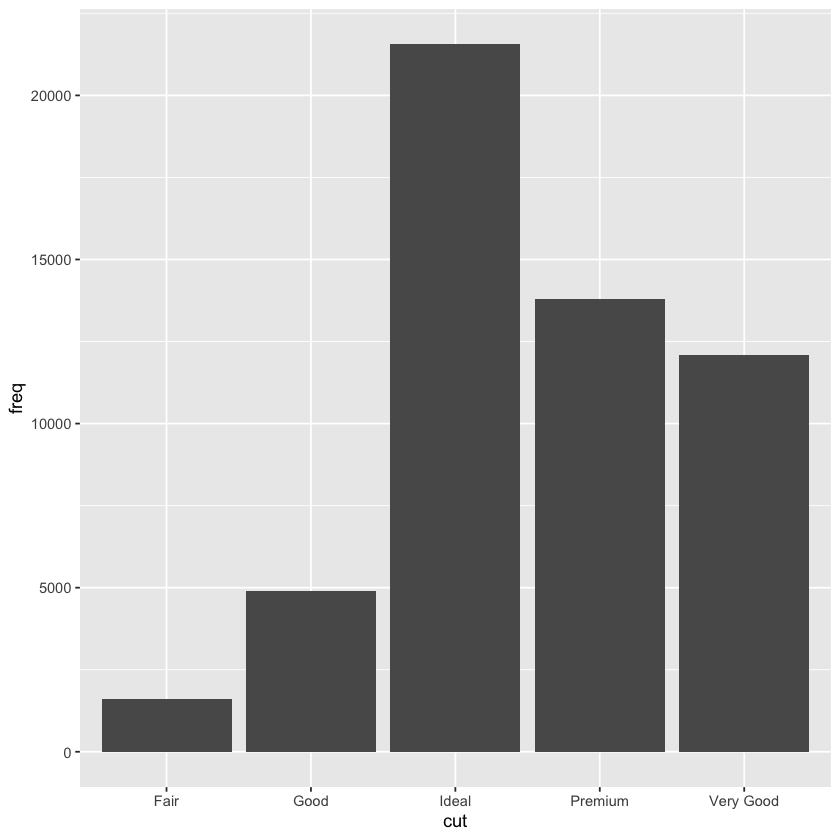

In [6]:
ggplot(data = demo) +
  geom_bar(mapping = aes(x = cut, y = freq), stat = "identity")

In the above code, we have modified the `stat` to be `identity`, indicating that we do not want `geom_bar` to automatically perform any statistical transformation to our data.  We also indicate that we want the `y-axis` of the barchart to display `frequency`.  

### Question: what if we want to change the order of the cut

If you want the categories to be ordered in some other way, you can create a factor with levels in your desired order. Note that `demo$cut` is the way we refer to the `cut` column of the tibble `demo`.

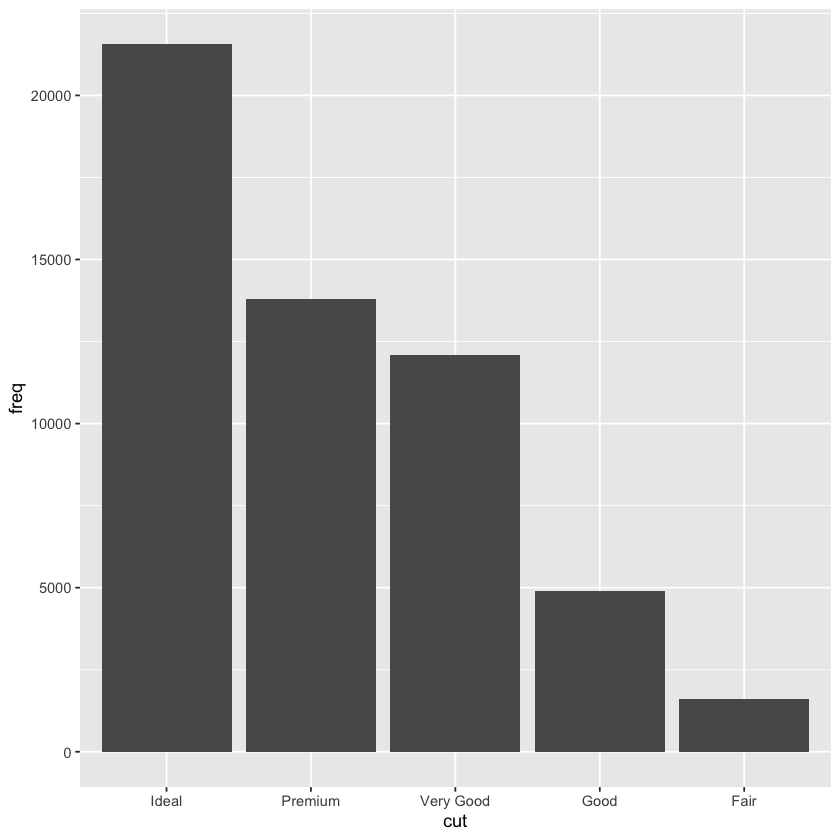

In [7]:
demo$cut <- factor(demo$cut, levels = c("Ideal", "Premium", "Very Good", "Good", "Fair"))
ggplot(data = demo) +
  geom_bar(mapping = aes(x = cut, y = freq), stat = "identity")

**Remark:** We have used `geom_bar` to plot a barchart where the `y-axis` is frequency/counts, the `x-axis` is cut, and the bar height represents **counts/frequency**.  What if we want to plot a bar chart with the bar heights representing some values in the data? 

`geom_col` is used when you wants the bar heights to represent values in the data. E.g., the plot below shows the total **price** (in millions of dollars) of the diamonds in each **cut** category.

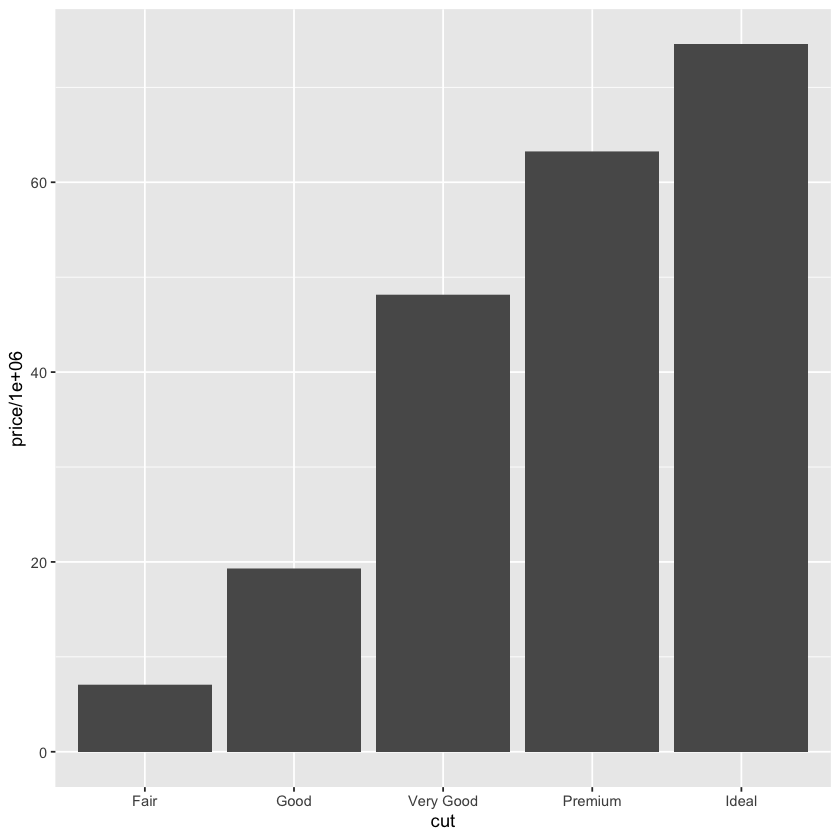

In [8]:
ggplot(data = diamonds) +
    geom_col(mapping = aes(x = cut, y = price / 1e6))

There are a lot of transformations that `geom_bar` is doing internally to create the plot above. E.g., one way to generate the plot by doing explicit data transformations is as follows. Don't worry about the details; we will cover data transformations (like `select`, `group_by`, `summarise`) later.

In [9]:
(my_tibble <- select(diamonds, cut, price) %>%
    group_by(cut) %>%
    summarise(total_price_millions = sum(price)/1e6))

cut,total_price_millions
<ord>,<dbl>
Fair,7.01760
Good,19.27501
Very Good,48.10762
Premium,63.22150
Ideal,74.51349


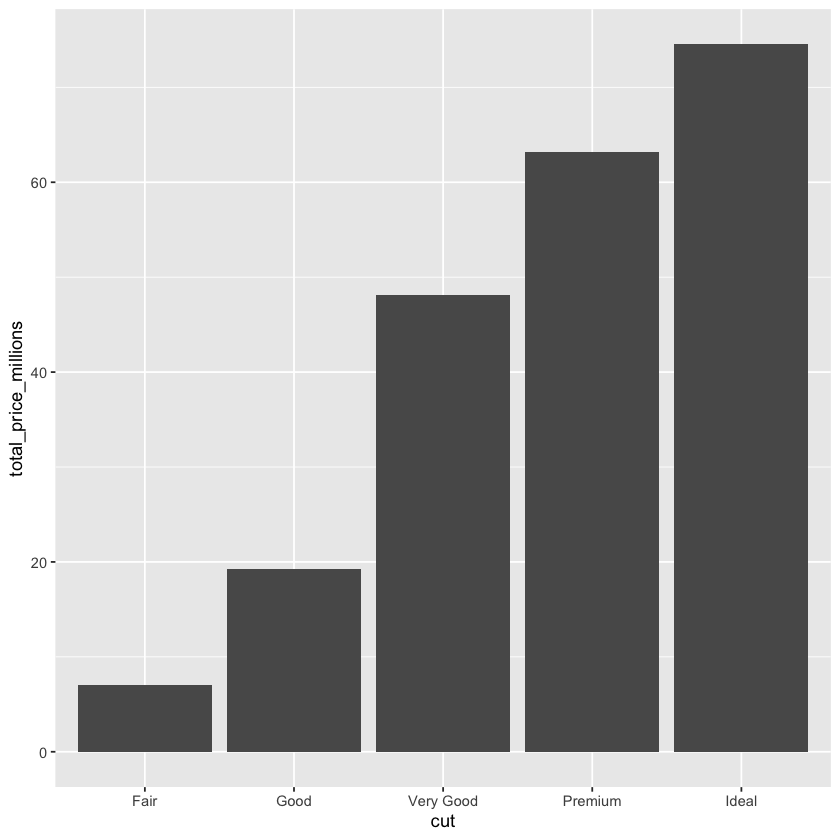

In [10]:
ggplot(data = my_tibble) +
    geom_bar(mapping = aes(x = cut, y = total_price_millions), stat = "identity")

# Position Adjustments

We can incorporate various modifications to our barchart, and this is done with what we referred to as position adjustments.  Let us see what happens when we map the **color** aesthetic to the **cut** variable in `geom_bar`.

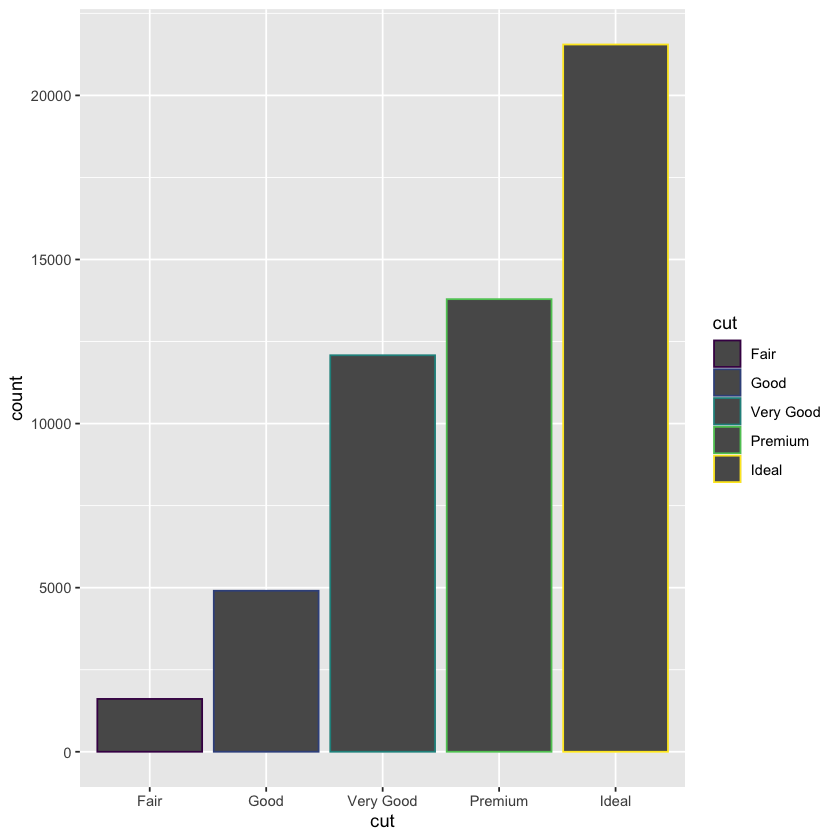

In [11]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, color = cut))

It just changed the boundary color. Using the **fill** aesthetic will change the color of the entire bars.

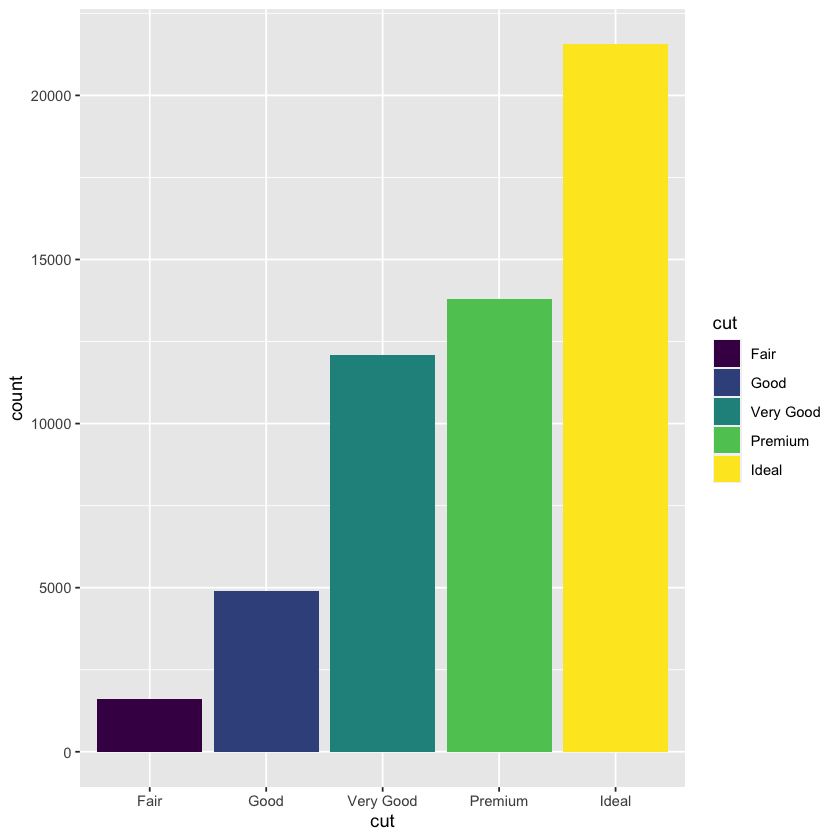

In [12]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = cut))

Adding colors to each cut is not really helpful here since each column is already representing the different cuts.  How about we map the `fill` aesthetic to some variable other than **cut**, say **clarity**?

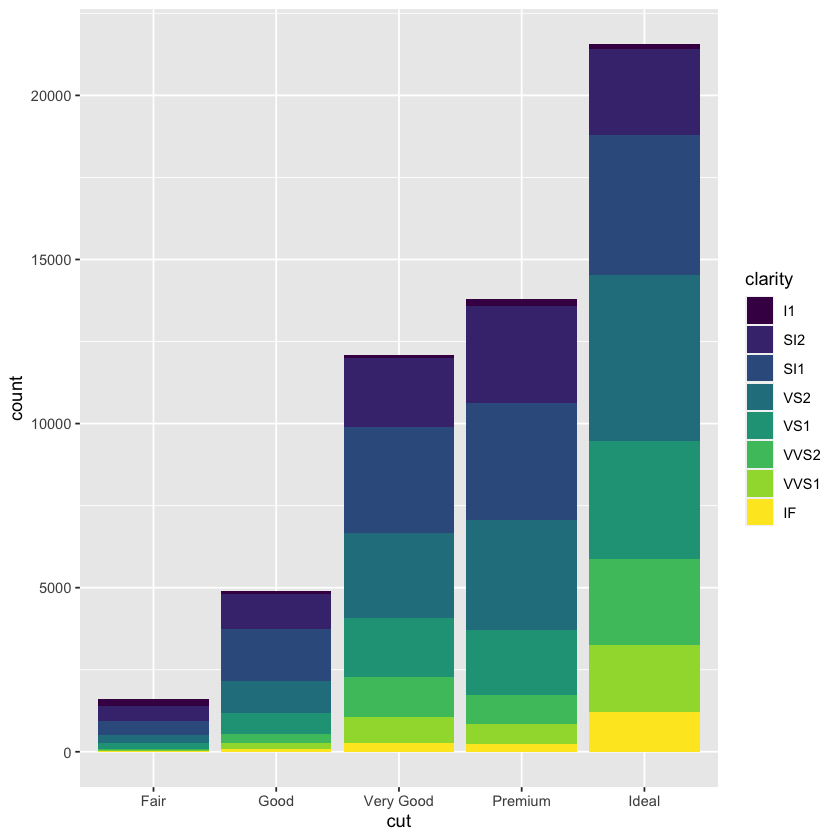

In [13]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = clarity))

We see that the above code stacks the bars based on its clarity for each cut.  The width of each color is different, denoting the number of counts for each of the clarity for each cut.  

If stacking is not the behavior you want, you can set the **position** argument to something else.  For `geom_bar` there are three options -- `identity`, `fill`, and `dodge`.

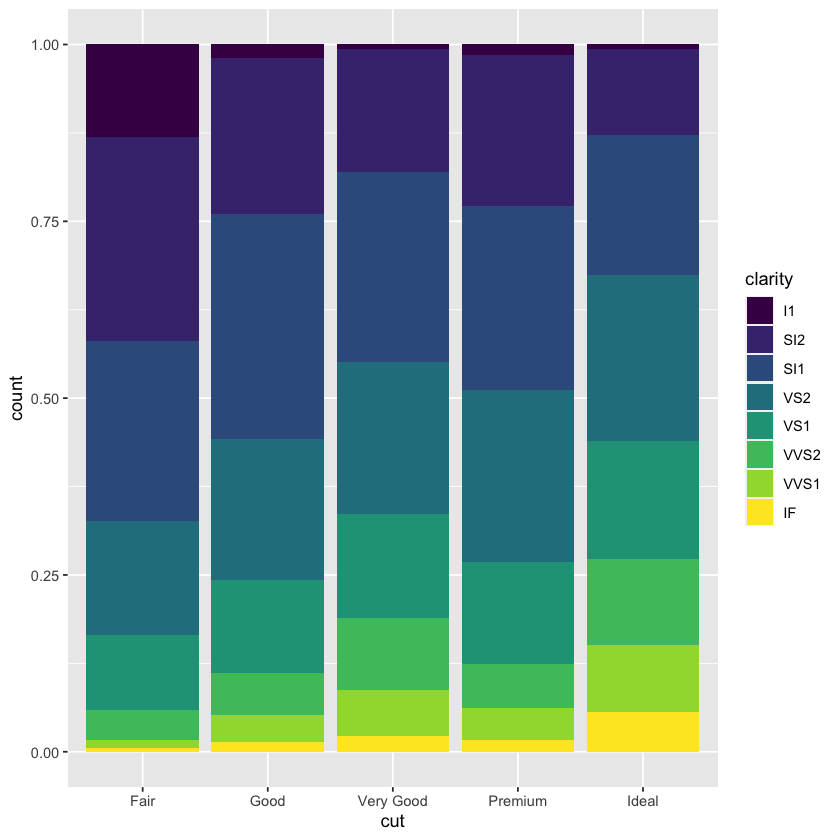

In [14]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill") # stacks but shows proportions

Position `fill` works like stacking but makes each set of stacked bars the same height.  The `y-axis` is replaced by the proportion rather than counts.  This can be useful when we are interested in understanding the proportion of clarity within each cut. In fact, the above plot suggests that for diamond that is cut ideally, the clarity tends to also be high.    

We could also plot a barchart seperated by clarity and cut simultaneously using `position = "dodge"`.  This will put the bars side by side.  

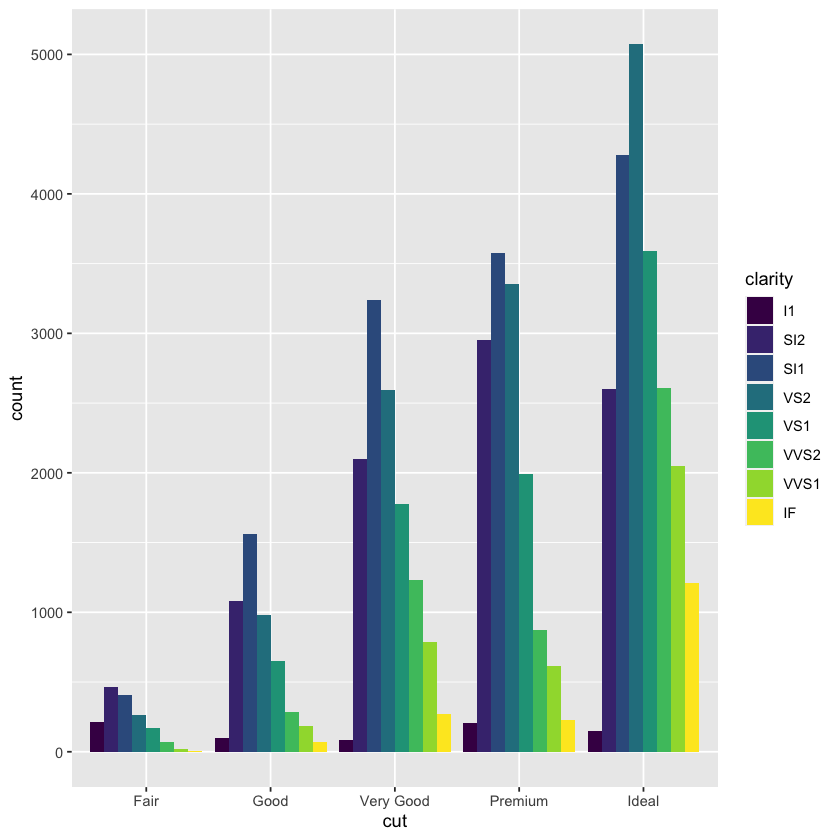

In [15]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")

# Coordinate Systems

Next we are going to talk about how we modify the coordinate system of the graph.  By default, we have the Cartesian coordinate system where we have `x-axis` and `y-axis` to indicate the position of each point. In certain cases, we may find some other coordinate systems helpful.    

Let us start simple by making our bars in our bar charts touch each other. 

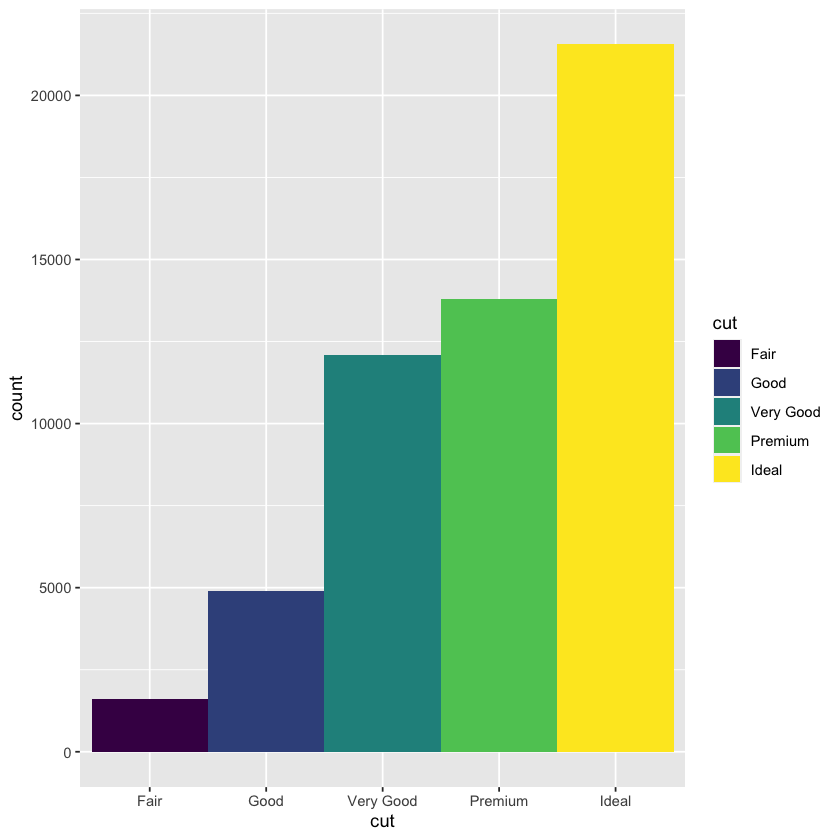

In [16]:
(bar <- ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = cut), width = 1)) 

We set width so that the bars touch.  Now let us change to polar coordinates and see what we get.  

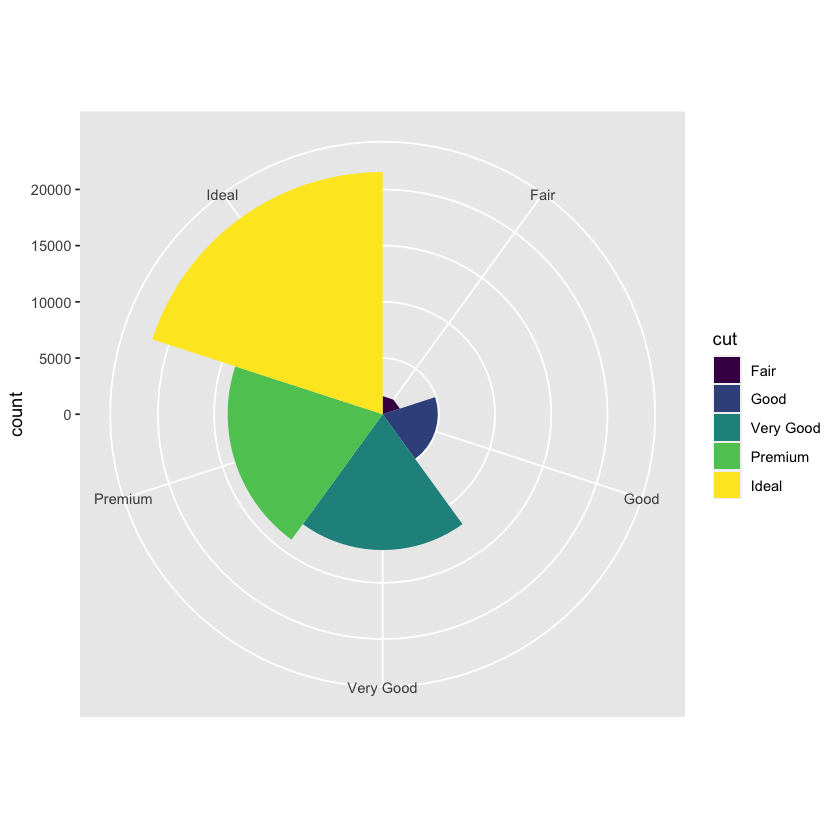

In [17]:
bar +
    labs(x = NULL) + # remove the x axis label "cut"
    coord_polar() # change to polar coordinates to get a Coxcomb chart

This is also called the **Coxcomb chart**.  `labs(x = NULL)` removes the `x-axis` label "cut", and `coord_polar` changes the cartersian coordinates to polar coordinates. 

### Remark: 
Remember `ggplot` is layer-based.  What we did above is to create a bar charts and assign it to the variable bar.  Then, we add in some additional arguments and convert the bar charts into polar-coordinate, giving us a coxcomb chart.  The following code will also produce the same plot.  

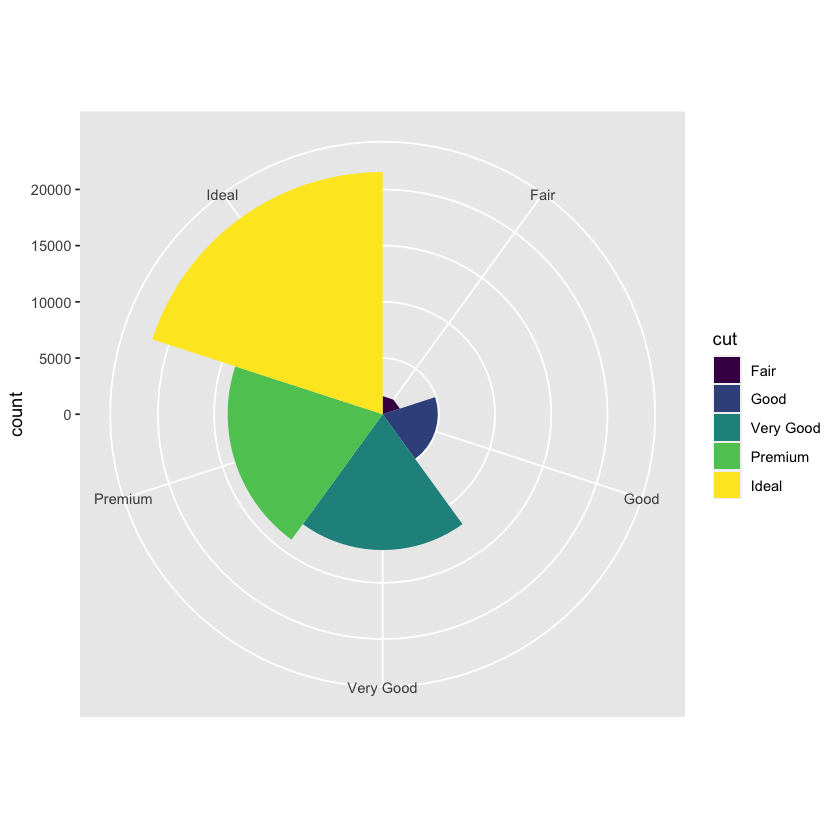

In [18]:
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = cut), width = 1) + labs(x = NULL) +  coord_polar()

### Pie Chart! 

A **pie chart** is a circular chart where the angle of each wedge is proportional to the frequency of each category. Mathematically, this amounts to mapping the $y$ coordinate (height) to angle (radians). `ggplot()` lets us make pie charts, though it is not easy. (There is no `geom_pie()`.)

To get a **pie chart**, we have to create a **stacked bar chart** first

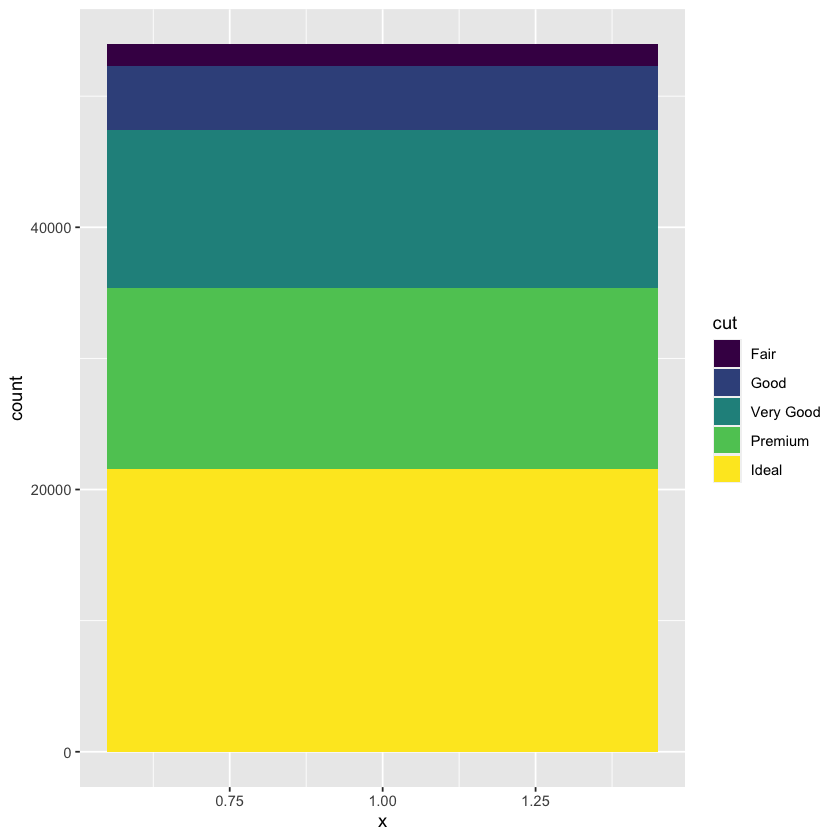

In [19]:
(bar <- ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = 1, fill = cut)))

Note the use of a dummy constant variable `1` in the code fragment `geom_bar(mapping = aes(x = 1, fill = cut), width = 1))` above. This is because using the `fill` aesthetic requires me to first specify the `x` aesthetic. So I just created a dummy variable for that purpose.

Now we are going to convert the Cartersian coordinate into polar coordinate. 

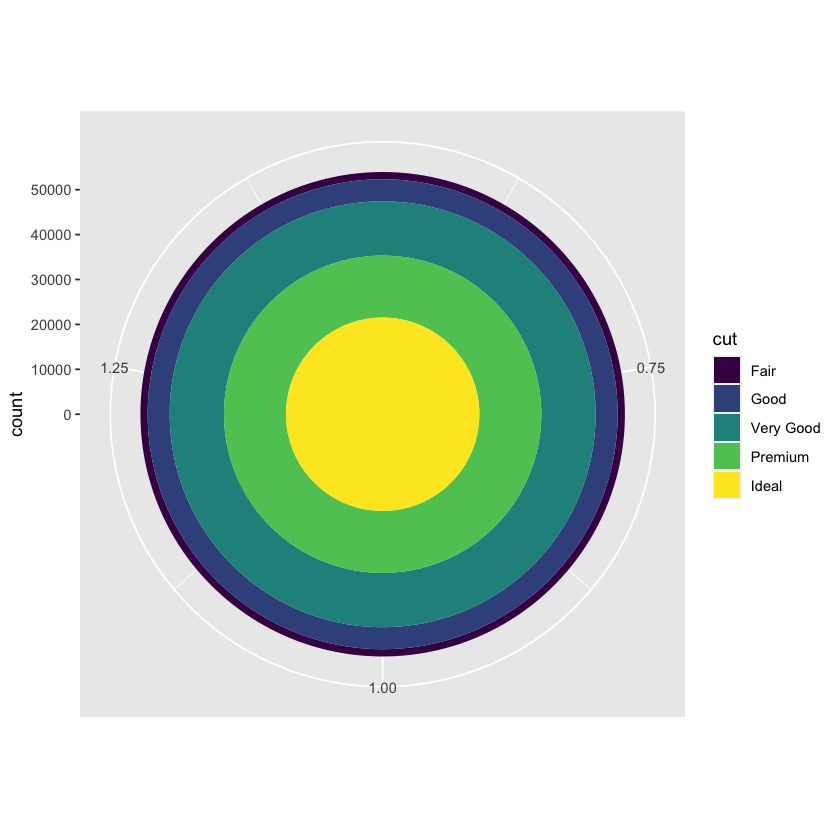

In [20]:
bar + labs(x = NULL) + coord_polar() 

Yikes, what happen here? By default, it will map to the radial coordinate giving us a **bullseye chart**.  

To get a proper pie chart, we map the Y axis of the bar chart to the angle **theta**. 

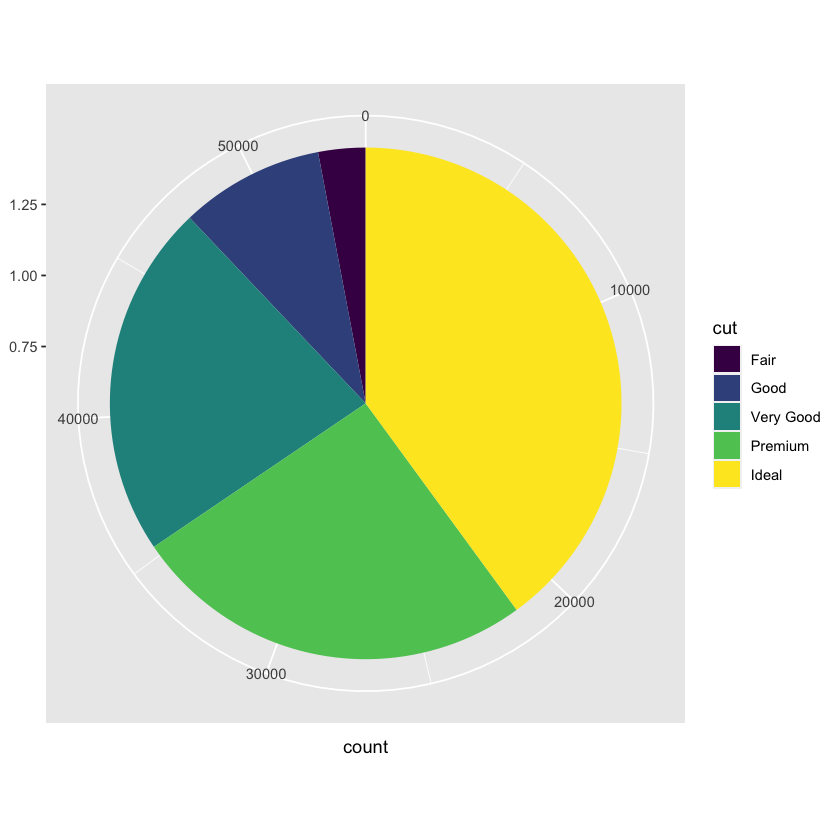

In [21]:
bar + labs(x = NULL) + coord_polar(theta ="y")

There is another use case involving a dummy variable. You might want to show proportions instead of counts. You realize reading the documentation [here](https://ggplot2.tidyverse.org/reference/geom_bar.html#computed-variables) that the `stat_count` statistical transformation internally computes variables `..count..` and `..prop..`. So you try the following code.

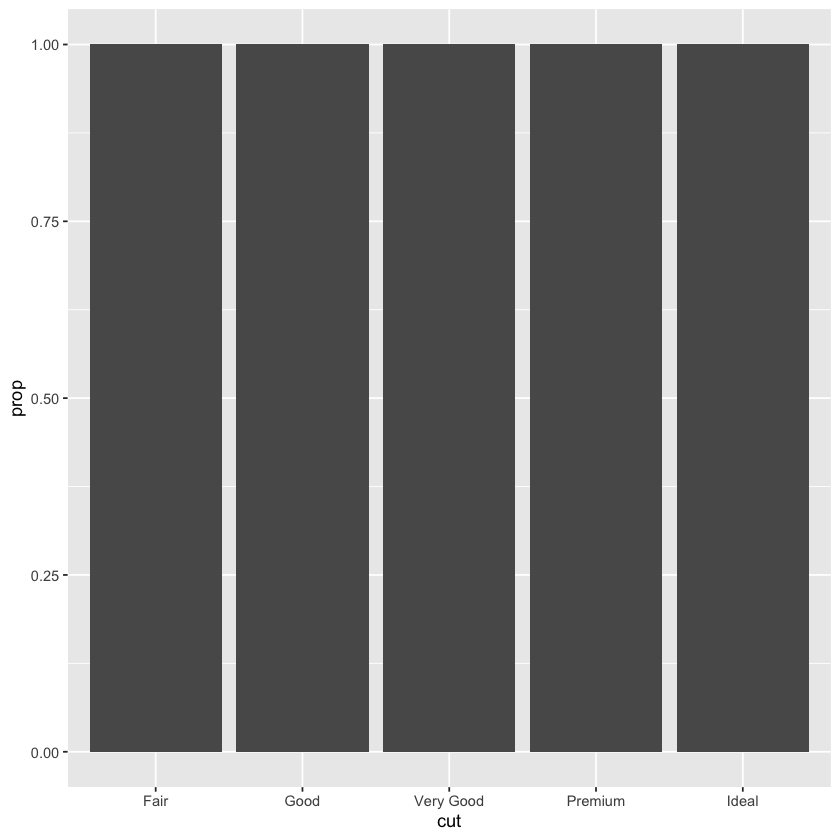

In [22]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, y = ..prop..))

This doesn't work because the rows get grouped by `cut` and within each group, the proportion of that `cut` category is obviously 1. So, again the solution is to use a dummy variable. It doesn't matter what the value of the variable is. We can set it to 306!

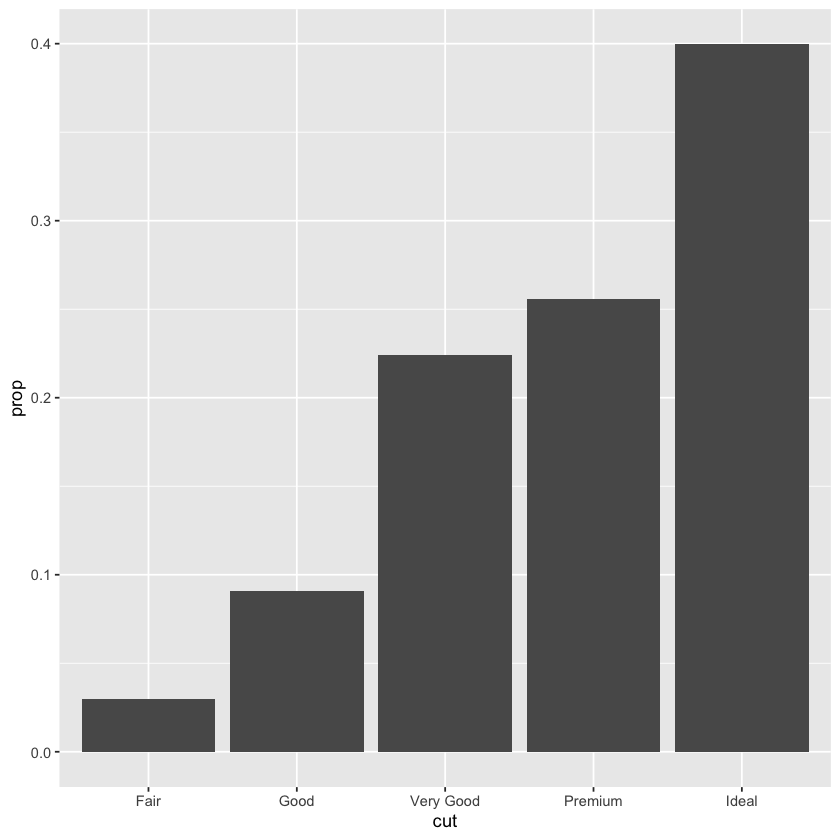

In [23]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, y = ..prop.., group = 306))

Now you have learned about all elements of the following ggplot template:

```r
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

# Case Studies

We start with the `mpg` data set.  

In [24]:
print(mpg)

# A tibble: 234 × 11
   manufacturer model      displ  year   cyl trans drv     cty   hwy fl    class
   <chr>        <chr>      <dbl> <int> <int> <chr> <chr> <int> <int> <chr> <chr>
 1 audi         a4           1.8  1999     4 auto… f        18    29 p     comp…
 2 audi         a4           1.8  1999     4 manu… f        21    29 p     comp…
 3 audi         a4           2    2008     4 manu… f        20    31 p     comp…
 4 audi         a4           2    2008     4 auto… f        21    30 p     comp…
 5 audi         a4           2.8  1999     6 auto… f        16    26 p     comp…
 6 audi         a4           2.8  1999     6 manu… f        18    26 p     comp…
 7 audi         a4           3.1  2008     6 auto… f        18    27 p     comp…
 8 audi         a4 quattro   1.8  1999     4 manu… 4        18    26 p     comp…
 9 audi         a4 quattro   1.8  1999     4 auto… 4        16    25 p     comp…
10 audi         a4 quattro   2    2008     4 manu… 4        20    28 p     comp…
# … wit

Make a scatterplot of year vs highway gas mileage. 

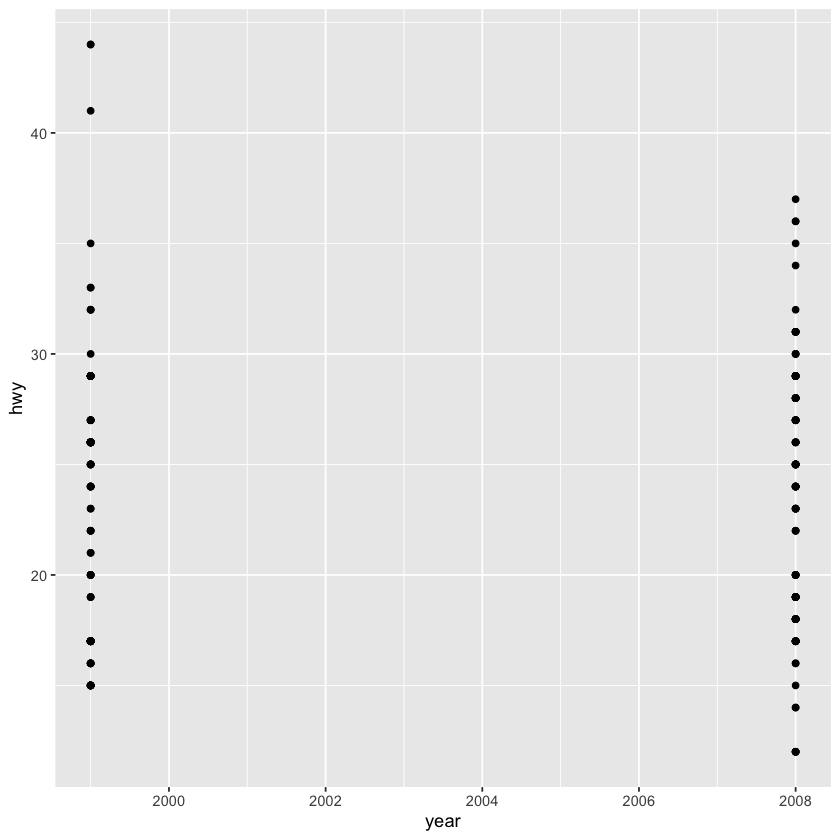

In [25]:
ggplot() + geom_point(data = mpg, aes(x = year, y = hwy))

It turns out that there are only two years represented in the data, not really enought to paint a full picture over time. Instead we can treat year as a categorical variable and look at the distribution of **hwy** within each value of year. For this we will use a new geom called ``boxplot``:

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”


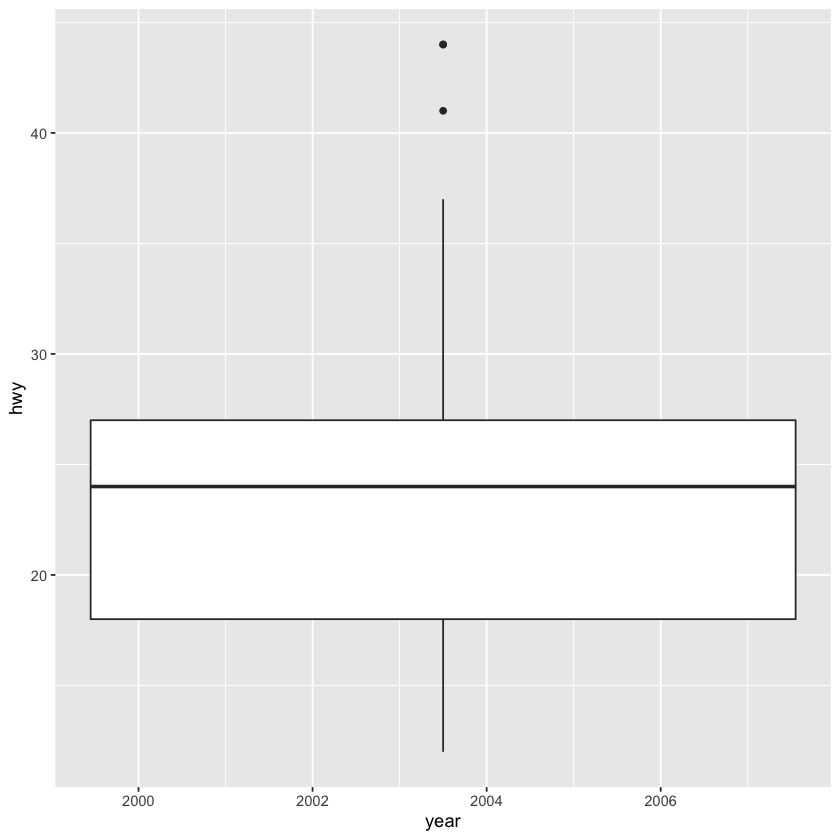

In [26]:
ggplot() + geom_boxplot(data = mpg, mapping = aes(x=year, y=hwy))

This doesn't quite do what we want. Just like the warning message says, the problem is that the **year** variable is continuous. However since we have only a few different values of year in our data set, we need to tell R that we want to temporarily think of it as discrete. The way to do this is by converting **year** to a factor:

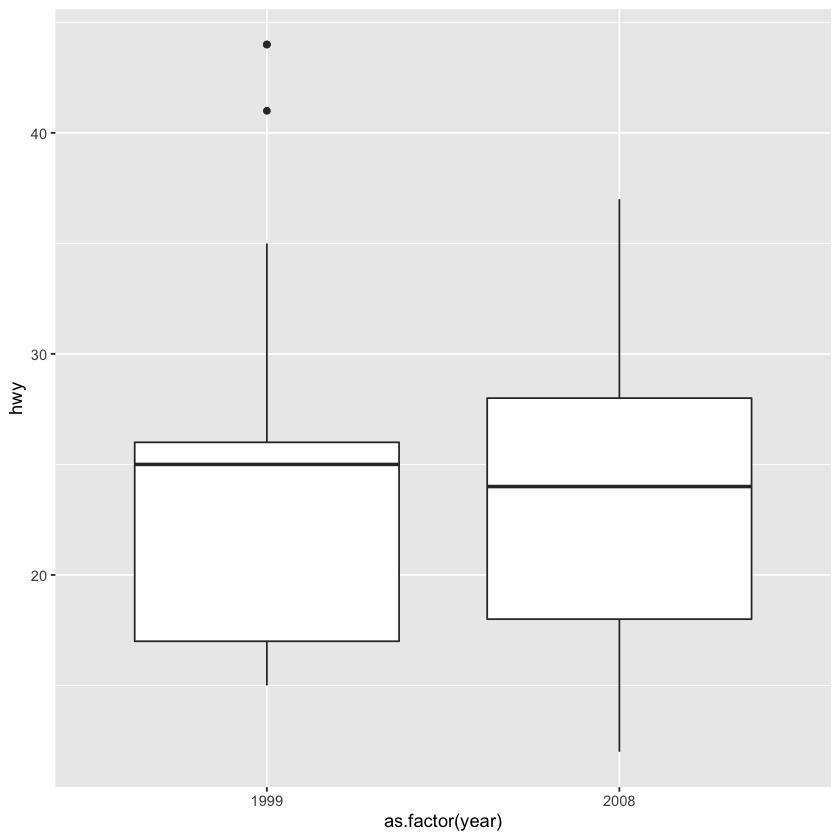

In [27]:
ggplot() + geom_boxplot(data = mpg, mapping = aes(x=as.factor(year), y=hwy))

The boxplot displays the following information: 
*  minimum
*  maximum
*  25% Quartile
*  75% Quartile
*  median

Surprisingly, the median highway gas mileage went down from 1999 to 2008. Why might this be? Let's try plotting the fraction of car types represented in each data set. To do this we will plot a bar chart. This takes one aesthetic called `x=` and makes a plot with the number of times that each (discrete) value of `x` appears in the data set. Here is an example which counts the number of cars in each class:

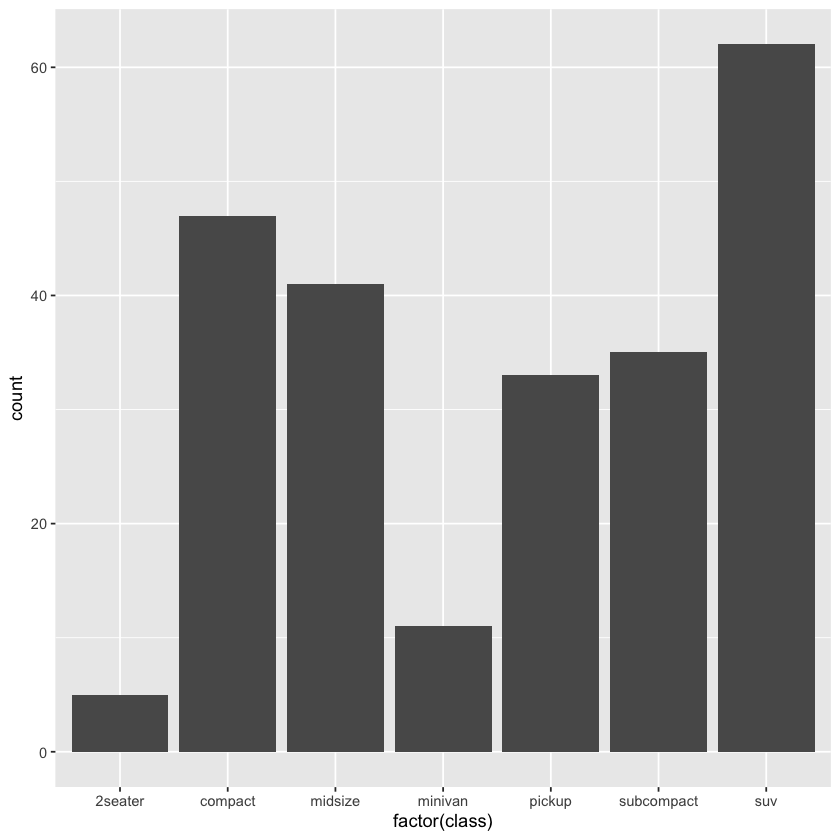

In [28]:
ggplot(mpg) + geom_bar(aes(x=factor(class)))

We will now make a plot of the number of different auto classes in 1999 vs 2008:

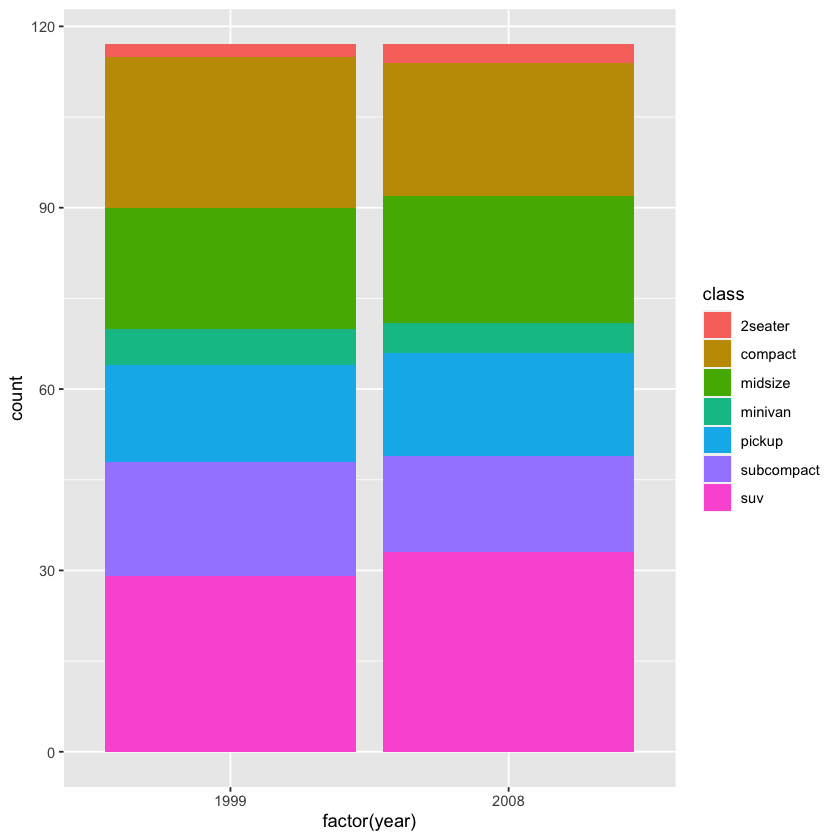

In [29]:
ggplot(mpg) + geom_bar(aes(x=factor(year), fill=class))

##  Understaning Millenials 

## Millenials
Next we will focus on data set released by the [Pew Research Center](https://www.pewsocialtrends.org/2010/02/24/millennials-confident-connected-open-to-change/) on ... millennials!

![millennials](https://images2.minutemediacdn.com/image/upload/c_crop,h_1189,w_2119,x_0,y_225/f_auto,q_auto,w_1100/v1561494201/shape/mentalfloss/586493-istock-862201574.jpg)

The data set we will analyze is based on a survey of about 2,000 people done in 2011:

In [30]:
getwd()
load("millennials.RData") # Remember to put this file in the same directory as your R session
head(mil)

[1] "/Users/keanmingtan/Dropbox/Teaching/Umich2019/Fall2021/STATS306/Lecture/Lecture2_km"

age,state,q1,q8a,q8b,q8c,q8d,q8e,q8f,q8g,⋯,q44g,q44i,q45a,q46,employ,lwp,finan,home2,educ,health
<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
28,NY,Very happy,Very important but not the most,Very important but not the most,Very important but not the most,Very important but not the most,Very important but not the most,Not important,Very important but not the most,⋯,NA,NA,No,NA,Full-time,NA,No,Rent,"Some college, no 4-year degree (including associate degree)",Covered by health insurance
33,NE,Very happy,Not important,One of the most important things,One of the most important things,Very important but not the most,Very important but not the most,Not important,One of the most important things,⋯,NA,NA,Yes,1,Part-time,NA,No,NA,"Some college, no 4-year degree (including associate degree)",Covered by health insurance
45,IN,Pretty happy,Somewhat important,One of the most important things,Somewhat important,One of the most important things,Somewhat important,Not important,Somewhat important,⋯,Yes,No,No,NA,Not employed,Lived with current spouse before married,NA,NA,"College graduate (B.S., B.A., or other 4-year degree)",Covered by health insurance
66,IN,Very happy,Very important but not the most,Very important but not the most,Very important but not the most,Very important but not the most,Somewhat important,Not important,Very important but not the most,⋯,NA,NA,No,NA,Part-time,NA,NA,NA,High school incomplete (Grades 9-11),Covered by health insurance
52,VA,Very happy,One of the most important things,Very important but not the most,Very important but not the most,One of the most important things,Somewhat important,Not important,Very important but not the most,⋯,Yes,Yes,No,NA,Full-time,Lived with both current spouse and someone else,NA,NA,"College graduate (B.S., B.A., or other 4-year degree)",Covered by health insurance
VOL DON'T KNOW/REFUSED,MD,Very happy,Somewhat important,One of the most important things,One of the most important things,Very important but not the most,Somewhat important,Not important,(VOL) Don't know/Refused,⋯,NA,Yes,No,NA,Not employed,NA,NA,NA,"Some college, no 4-year degree (including associate degree)",Covered by health insurance


Each column of the data corresponds to one of the question asked during the survey. You can find the full script in the `Millennials_Ques.pdf` in Canvas or Github.

## Bar charts
Let us try to explore Question 20 in the pdf:

    Q.20	How often do you visit the social networking site you use most often… several times a day, about once a day, every few days, once a week or less often?
    
Plot a barchart to visualize the data collected for answering Question 20. 

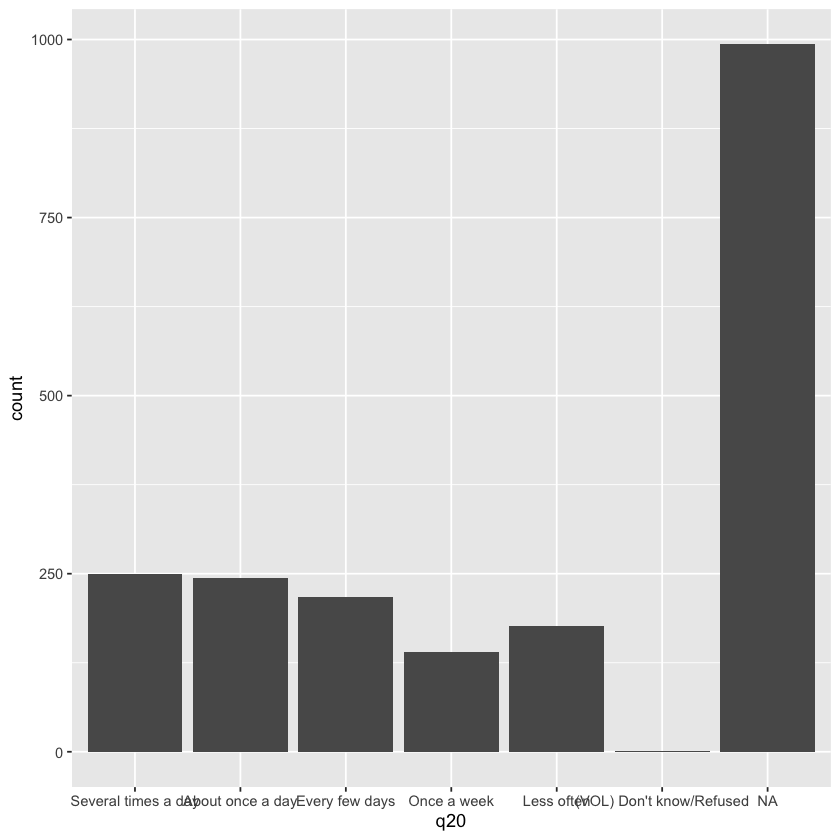

In [31]:
ggplot(data = mil) + geom_bar(mapping = aes(x = q20))

As we can see from the plot, there are a lot of missing values. Moreover, the labels on the `x-axis` overlaps with each other.  We will now plot those bars on the `y-axis` to avoid overlapping labels.

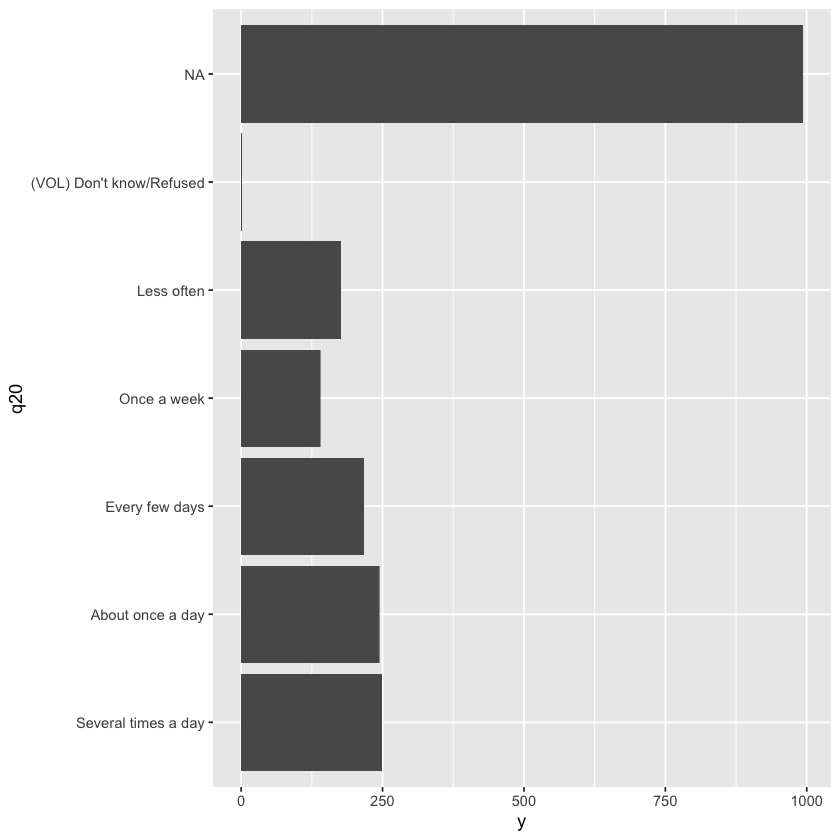

In [32]:
ggplot(data = mil) +
    geom_col(mapping = aes(x = q20,  y = 1)) + coord_flip()

Let's try to improve the plot by introducing colors to the bar charts. 

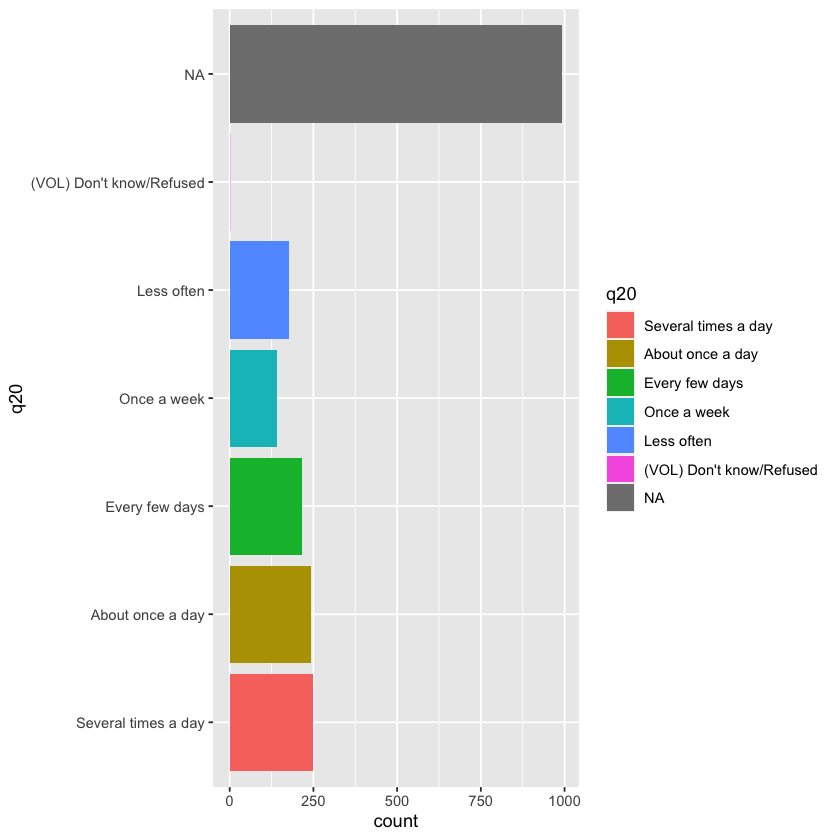

In [33]:
ggplot(data = mil) + geom_bar(mapping = aes(x = q20, fill = q20)) + coord_flip()

What happens when we map the `fill` aesthetic to some variable other than `q20`? For example, let's visualize social media usage relative to the response to the question:

    EMPLOY	How much are you employed?

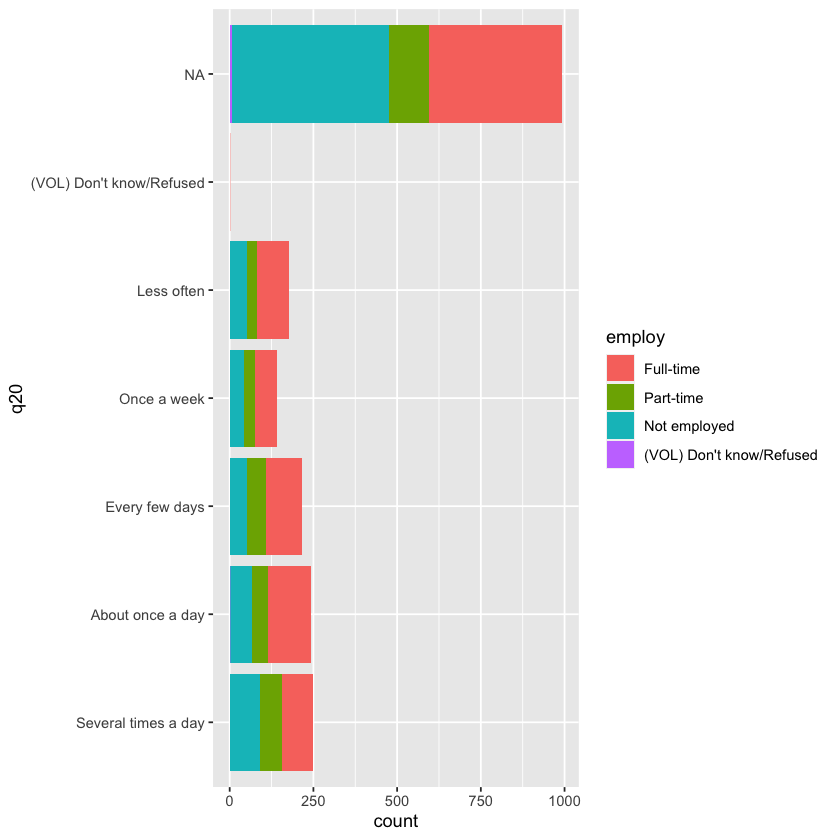

In [34]:
ggplot(data = mil) + geom_bar(mapping = aes(x = q20, fill = employ)) + coord_flip()

We could also remove the missing values before we plot.

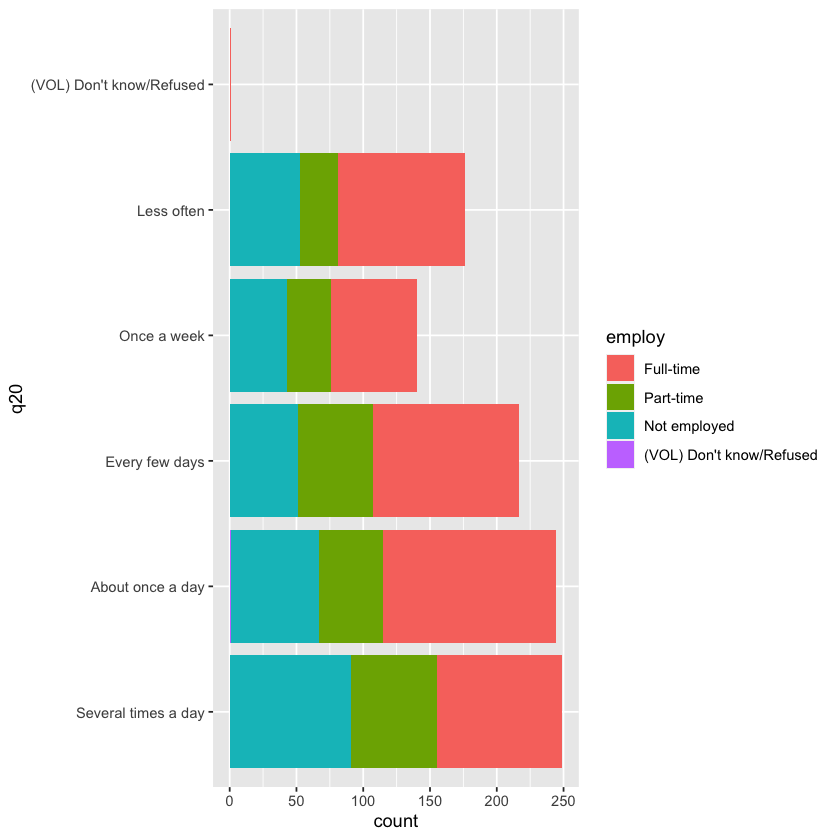

In [35]:
ggplot(data = filter(mil, !is.na(q20))) +
    geom_bar(mapping = aes(x = q20, fill = employ)) + coord_flip()

What if we want to compare the proportion of employment status for each q20.

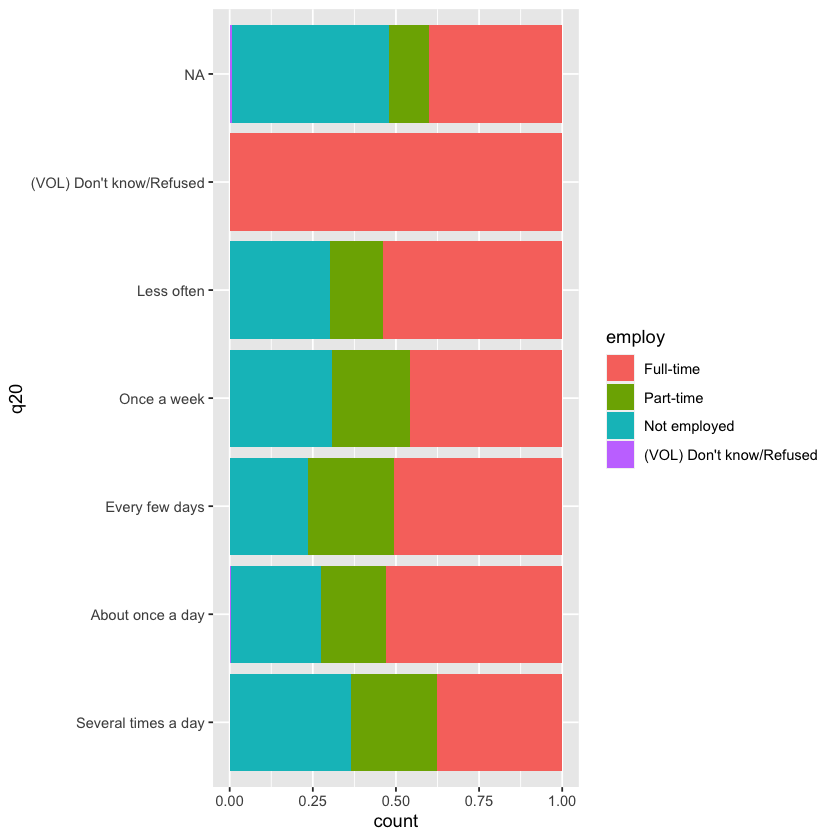

In [36]:
ggplot(data = mil) +
    geom_bar(mapping = aes(x = q20, fill = employ), 
             position = "fill") + coord_flip()

### Pie Charts

Let's try plotting a piechart to explore the question 

    Q.36	How closely do you watch the amount of money you spend?

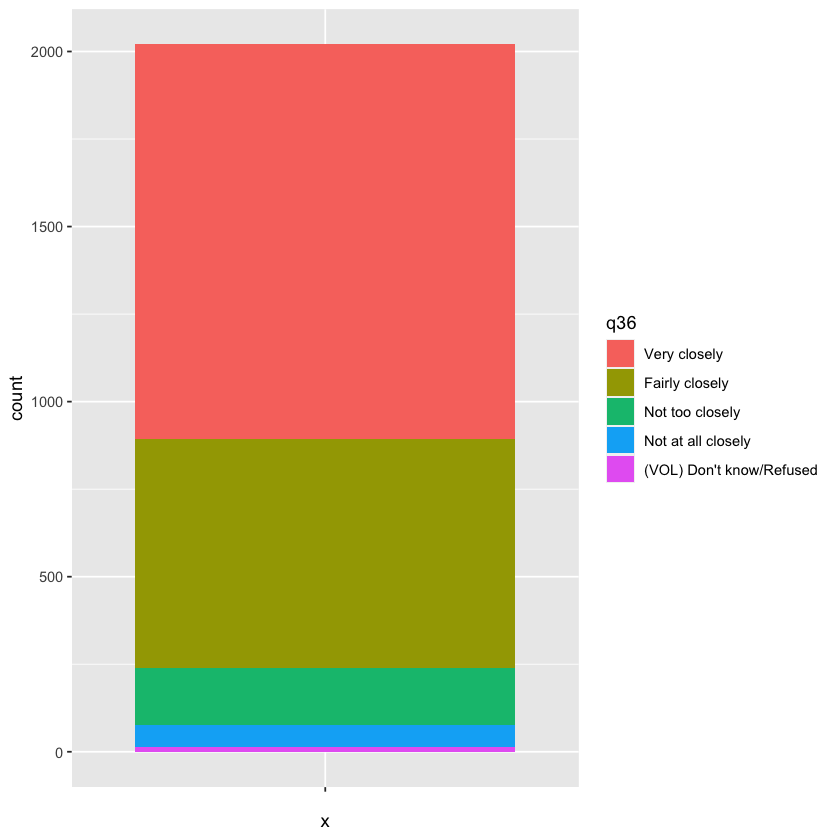

In [37]:
ggplot(mil) + geom_bar(aes(x="", fill=q36)) 

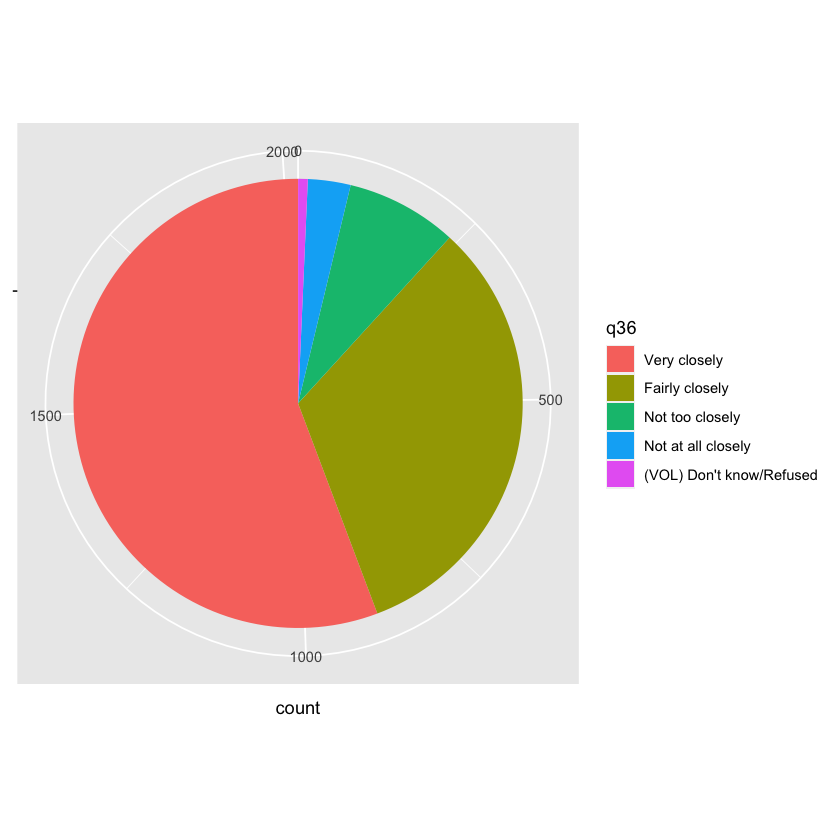

In [38]:
ggplot(mil) + geom_bar(aes(x="", fill=q36)) + labs(x = NULL) + coord_polar(theta="y") 

From the piechart, we learn that majority of millenials tend to be more financially responsible and tend to monitor their spending very closely and fairly closely.  

### Using Facets

We already saw how to add a third variable to a scatter plot by using a color aesthetics. **Facets** provide another way to stratify plots by additional variables. Let's look at responses to:
    
    AGE.    What is your age?
    Q44g.	Have you ever sent or received a text message while driving?
    Q44i.	Have you ever placed your cell phone on or right next 
            to your bed while sleeping?

Plot boxplots for age segregated by Q44g.  

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 33 rows containing non-finite values (stat_boxplot).”


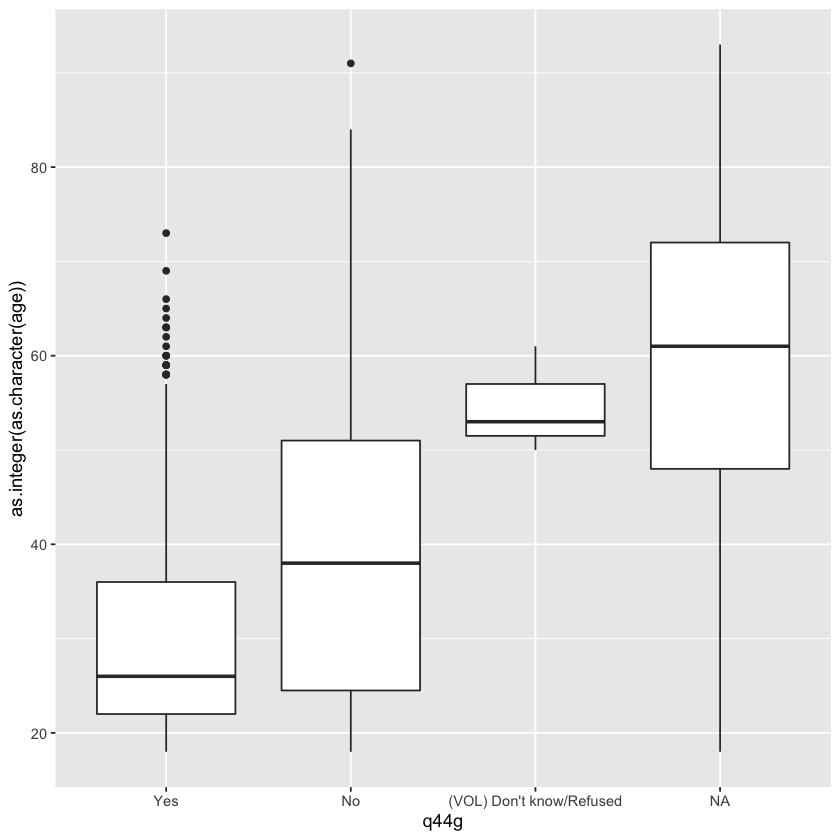

In [39]:
ggplot(mil) + geom_boxplot(aes(x=q44g, y=as.integer(as.character(age))))

What if we want to understand a combination of Q44g and Q44i?

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 33 rows containing non-finite values (stat_boxplot).”


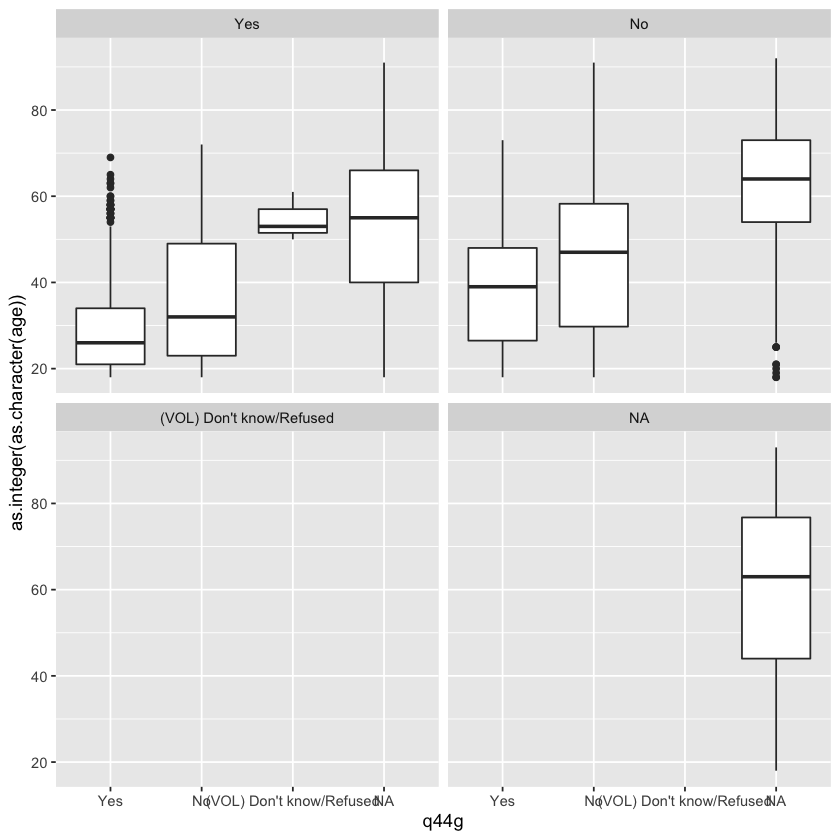

In [40]:
ggplot(mil) + geom_boxplot(aes(x=q44g, y=as.integer(as.character(age)))) + facet_wrap(~ q44i)

## Other interesting questions
Here are all the question definitions in this data set that you can explore: 

Q.8	Please tell me how important each is to you personally.
	a.	Being successful in a high-paying career or profession 
	b.	Having a successful marriage 
	c.	Living a very religious life 
	d.	Being a good parent 
	e.	Having lots of free time to relax or do things you want to do 
	f.	Becoming famous 
	g.	Helping other people who are in need 
	h.	Owning your own home 

    Q.20	How often do you visit the social networking site you use most often.
    
    Q.25 	Thinking about the past 24 hours, about how many text messages did you send and receive on your cell phone? 

    Q.36	How closely do you watch the amount of money you spend?
    
    Q. 41   Do you strongly favor, favor, oppose, or strongly oppose allowing gay and lesbian couples to marry legally?
    
    Q.44	
        a.	Do you recycle paper, plastic or glass from home? 
        b.	Do you have a close friend or family member who is gay? 
        c.	Do you happen to have any guns, rifles or pistols in your home? 
        d.	Have you ever posted a video of yourself online? 
        g.	Have you ever sent or received a text message while driving?
        i.	Have you ever placed your cell phone on or right next to your bed while sleeping?
    
    Q.46	How many tattoos do you have?
    
    HOME2	Do you own your home, rent, live in a dorm or live with your parents?
    LWP2 	Have you ever lived together with a partner without being married, or not?
    HEALTH	Are you, yourself, now covered by any form of health insurance or health plan or are you not covered at this time?
    FINAN	Do you depend on your parents or other family members for financial assistance, or not? 
    EDUC	What is the last grade or class that you completed in school? 
    AGE     How old are you?